# RFM Analysis results based on Ford dataset
### Kaan Akkartal 2020661

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
forddata = pd.read_csv("Forddata.csv", sep = ";")
df = forddata.copy()
df.head()

,Date bought,Customer,Bought,Amount
0,15.08.1990,113,other,"27,29"
1,16.08.1990,64,other,"24,48"
2,18.08.1990,49,ford,"37,21"
3,18.08.1990,54,ford,"40,95"
4,18.08.1990,83,other,"9,02"


In [3]:
df.tail()

,Date bought,Customer,Bought,Amount
630,19.07.2010,100,other,"13,51"
631,29.09.2010,104,other,"11,94"
632,22.01.2011,13,other,"3,53"
633,07.06.2011,16,ford,"48,66"
634,05.04.2012,2,ford,"22,64"


Dataset includes sales information between 15.08.1990 and 05.04.2012. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date bought  635 non-null    object
 1   Customer     635 non-null    int64 
 2   Bought       635 non-null    object
 3   Amount       635 non-null    object
dtypes: int64(1), object(3)
memory usage: 20.0+ KB


In [5]:
df.isnull().sum()

Date bought    0
Customer       0
Bought         0
Amount         0
dtype: int64

There are not any null values.

In [6]:
df.columns

Index(['Date bought', 'Customer', 'Bought', 'Amount'], dtype='object')

Feature names are checked if there are spacings inside them or not. 

In [7]:
df['date'] = pd.DatetimeIndex(df["Date bought"]).date

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date bought  635 non-null    object
 1   Customer     635 non-null    int64 
 2   Bought       635 non-null    object
 3   Amount       635 non-null    object
 4   date         635 non-null    object
dtypes: int64(1), object(4)
memory usage: 24.9+ KB


In [9]:
recency = df.groupby(['Customer'],as_index=False)['date'].max()
recency.head()

,Customer,date
0,1,2006-09-23
1,2,2012-05-04
2,3,2001-03-04
3,4,2009-05-20
4,5,1998-04-08


In [10]:
import datetime as dt
now = dt.date(2012,5,4)

We use the latest date as our current date. 

In [11]:
now

datetime.date(2012, 5, 4)

In [12]:
recency["Recency"] = recency["date"].apply(lambda x : (now - x).days)

In [13]:
recency.head()

,Customer,date,Recency
0,1,2006-09-23,2050
1,2,2012-05-04,0
2,3,2001-03-04,4079
3,4,2009-05-20,1080
4,5,1998-04-08,5140


Recency is calculated for each customer.

In [14]:
frequency_df = df.copy()
frequency_df.drop_duplicates(subset=['Customer','date'], keep="first", inplace=True) 
frequency_df = frequency_df.groupby('Customer',as_index=False)['Bought'].count()
frequency_df.columns = ['Customer','Frequency']
frequency_df.head()

,Customer,Frequency
0,1,7
1,2,7
2,3,4
3,4,7
4,5,4


Frequency is calculated for each customer. 

In [15]:
df.Amount = df.Amount.str.replace(",",".")

In [16]:
df.head()

,Date bought,Customer,Bought,Amount,date
0,15.08.1990,113,other,27.29,1990-08-15
1,16.08.1990,64,other,24.48,1990-08-16
2,18.08.1990,49,ford,37.21,1990-08-18
3,18.08.1990,54,ford,40.95,1990-08-18
4,18.08.1990,83,other,9.02,1990-08-18


Monetary is calculated and the type is changed into float. 

In [17]:
df.Amount = df.Amount.astype(np.float32)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date bought  635 non-null    object 
 1   Customer     635 non-null    int64  
 2   Bought       635 non-null    object 
 3   Amount       635 non-null    float32
 4   date         635 non-null    object 
dtypes: float32(1), int64(1), object(3)
memory usage: 22.4+ KB


In [19]:
monetary_df = df.groupby('Customer',as_index=False)['Amount'].sum()
monetary_df.head()

,Customer,Amount
0,1,128.459991
1,2,173.339996
2,3,81.190002
3,4,152.330002
4,5,51.090000


In [20]:
monetary_df.shape

(117, 2)

In [21]:
recency.shape

(117, 3)

In [22]:
frequency_df.shape

(117, 2)

In [23]:
rf = recency.merge(frequency_df)
rf.head()

,Customer,date,Recency,Frequency
0,1,2006-09-23,2050,7
1,2,2012-05-04,0,7
2,3,2001-03-04,4079,4
3,4,2009-05-20,1080,7
4,5,1998-04-08,5140,4


In [24]:
rf.shape

(117, 4)

In [25]:
rfm = monetary_df.merge(rf)
rfm.head()

,Customer,Amount,date,Recency,Frequency
0,1,128.459991,2006-09-23,2050,7
1,2,173.339996,2012-05-04,0,7
2,3,81.190002,2001-03-04,4079,4
3,4,152.330002,2009-05-20,1080,7
4,5,51.090000,1998-04-08,5140,4


In [26]:
rfm.set_index("Customer", inplace = True)
rfm.head()

,Amount,date,Recency,Frequency
Customer,,,,
1,128.459991,2006-09-23,2050,7
2,173.339996,2012-05-04,0,7
3,81.190002,2001-03-04,4079,4
4,152.330002,2009-05-20,1080,7
5,51.090000,1998-04-08,5140,4


Recency, frequency and monetary tables are merged and customer numbers are set as index. 

In [27]:
rfm.loc[rfm.index == 12]

,Amount,date,Recency,Frequency
Customer,,,,
12,114.910004,1997-11-29,5270,4


In [28]:
rfm.describe()

,Amount,Recency,Frequency
count,117.000000,117.000000,117.000000
mean,109.593933,2990.025641,5.427350
std,39.754353,1354.057099,1.147082
min,41.010002,0.000000,4.000000
25%,79.619995,2050.000000,4.000000
50%,104.820000,3032.000000,5.000000
75%,136.750000,4170.000000,6.000000
max,209.279999,5516.000000,7.000000


Above, a random customer number is checked. Everything looks ok. 

Numerical metrics of monetary, recency and frequency are checked. 

In [29]:
rfm["Recency_Class"] = pd.qcut(rfm["Recency"], 3, ["3","2","1"])
rfm["Frequency_Class"] = pd.qcut(rfm["Frequency"], 3, ["1","2","3"])
rfm["Monetary_Class"] = pd.qcut(rfm["Amount"], 3, ["1","2","3"])

In [30]:
rfm.head()

,Amount,date,Recency,Frequency,Recency_Class,Frequency_Class,Monetary_Class
Customer,,,,,,,
1,128.459991,2006-09-23,2050,7,3,3,3
2,173.339996,2012-05-04,0,7,3,3,3
3,81.190002,2001-03-04,4079,4,1,1,1
4,152.330002,2009-05-20,1080,7,3,3,3
5,51.090000,1998-04-08,5140,4,1,1,1


Recency, frequency and monetary are scored as 1,2 and 3 in which 3 is the best and 1 is the worst score. 

In [31]:
rfm.loc[rfm.Amount == max(rfm.Amount)]

,Amount,date,Recency,Frequency,Recency_Class,Frequency_Class,Monetary_Class
Customer,,,,,,,
81,209.279999,2004-08-08,2826,6,2,2,3


The amount is maximum and monetary class is 3. 

In [32]:
rfm.loc[rfm.Frequency == max(rfm.Frequency)].head()

,Amount,date,Recency,Frequency,Recency_Class,Frequency_Class,Monetary_Class
Customer,,,,,,,
1,128.459991,2006-09-23,2050,7,3,3,3
2,173.339996,2012-05-04,0,7,3,3,3
4,152.330002,2009-05-20,1080,7,3,3,3
13,95.900002,2011-01-22,468,7,3,3,2
16,183.559998,2011-07-06,303,7,3,3,3


Frequency is maximum, the frequency class is 3.

In [33]:
rfm.loc[rfm.Recency == min(rfm.Recency)]

,Amount,date,Recency,Frequency,Recency_Class,Frequency_Class,Monetary_Class
Customer,,,,,,,
2,173.339996,2012-05-04,0,7,3,3,3


Recency is minimum, the recency class is also 3. 

In [34]:
rfm["Total_Score"] = rfm["Recency_Class"].astype(np.float32)*10 + rfm["Frequency_Class"].astype(np.float32)*10 
+ rfm["Monetary_Class"].astype(np.float32)*15
rfm.head()

,Amount,date,Recency,Frequency,Recency_Class,Frequency_Class,Monetary_Class,Total_Score
Customer,,,,,,,,
1,128.459991,2006-09-23,2050,7,3,3,3,60.0
2,173.339996,2012-05-04,0,7,3,3,3,60.0
3,81.190002,2001-03-04,4079,4,1,1,1,20.0
4,152.330002,2009-05-20,1080,7,3,3,3,60.0
5,51.090000,1998-04-08,5140,4,1,1,1,20.0


Total Score is calculated, by giving more weigh to Monetary than others. 

In [35]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 1 to 117
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Amount           117 non-null    float32 
 1   date             117 non-null    object  
 2   Recency          117 non-null    int64   
 3   Frequency        117 non-null    int64   
 4   Recency_Class    117 non-null    category
 5   Frequency_Class  117 non-null    category
 6   Monetary_Class   117 non-null    category
 7   Total_Score      117 non-null    float32 
dtypes: category(3), float32(2), int64(2), object(1)
memory usage: 5.2+ KB


In [36]:
rfm.Recency_Class = rfm.Recency_Class.astype(np.float32)

In [37]:
rfm.Frequency_Class = rfm.Frequency_Class.astype(np.float32)

In [38]:
rfm.Monetary_Class = rfm.Monetary_Class.astype(np.float32)

In [39]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 1 to 117
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Amount           117 non-null    float32
 1   date             117 non-null    object 
 2   Recency          117 non-null    int64  
 3   Frequency        117 non-null    int64  
 4   Recency_Class    117 non-null    float32
 5   Frequency_Class  117 non-null    float32
 6   Monetary_Class   117 non-null    float32
 7   Total_Score      117 non-null    float32
dtypes: float32(5), int64(2), object(1)
memory usage: 5.9+ KB


The type of the classes of recency, frequency and monetary are converted to float. 

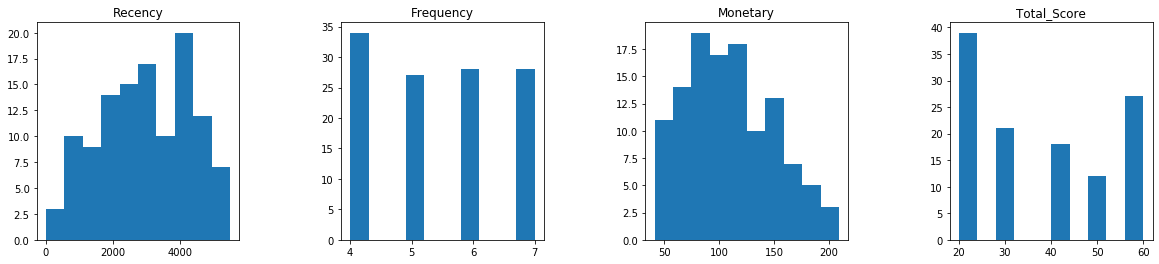

In [40]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

plt.subplot(2,4,1)
plt.hist(rfm.Recency)
plt.title("Recency")

plt.subplot(2,4,2)
plt.hist(rfm.Frequency)
plt.title("Frequency")

plt.subplot(2,4,3)
plt.hist(rfm.Amount)
plt.title("Monetary")

plt.subplot(2,4,4)
plt.hist(rfm.Total_Score)
plt.title("Total_Score");

Frequency is between 4-7. The graph of Monetary is right tailed. The accumulation is around 100. 

In [41]:
rfm["Total_Score2"] = rfm["Recency_Class"]*25 + rfm["Frequency_Class"]*10
+ rfm["Monetary_Class"]*1
rfm.head()

,Amount,date,Recency,Frequency,Recency_Class,Frequency_Class,Monetary_Class,Total_Score,Total_Score2
Customer,,,,,,,,,
1,128.459991,2006-09-23,2050,7,3.0,3.0,3.0,60.0,105.0
2,173.339996,2012-05-04,0,7,3.0,3.0,3.0,60.0,105.0
3,81.190002,2001-03-04,4079,4,1.0,1.0,1.0,20.0,35.0
4,152.330002,2009-05-20,1080,7,3.0,3.0,3.0,60.0,105.0
5,51.090000,1998-04-08,5140,4,1.0,1.0,1.0,20.0,35.0


In this case, the class of recency has the higher coefficient than others. Monetary became the least important metric.  

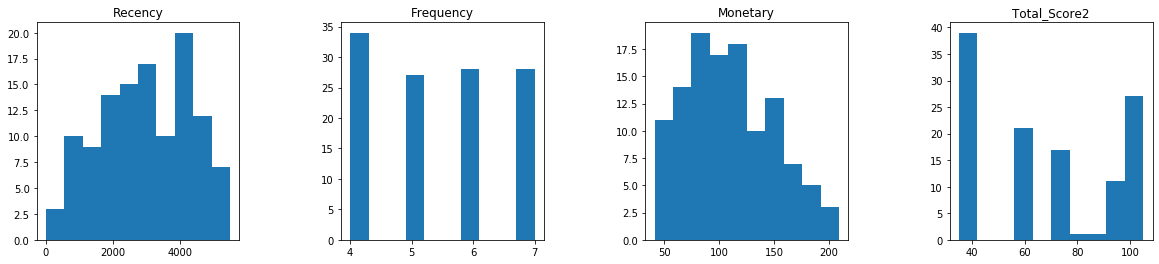

In [42]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

plt.subplot(2,4,1)
plt.hist(rfm.Recency)
plt.title("Recency")

plt.subplot(2,4,2)
plt.hist(rfm.Frequency)
plt.title("Frequency")

plt.subplot(2,4,3)
plt.hist(rfm.Amount)
plt.title("Monetary")

plt.subplot(2,4,4)
plt.hist(rfm.Total_Score2)
plt.title("Total_Score2");